In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x * 2 + np.random.normal(0, 1, size=100)

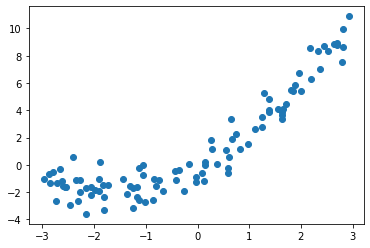

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [7]:
poly20_reg = PolynomialRegression(degree=20)
poly20_reg.fit(X_train, y_train)
mean_squared_error(y_test, poly20_reg.predict(X_test))

167.9401086936316

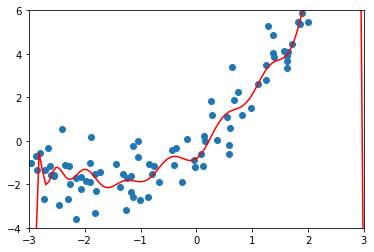

In [8]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='red')
    plt.axis([-3, 3, -4, 6])
    plt.show()
    
plot_model(poly20_reg)

# LASSO

In [10]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [11]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
mean_squared_error(y_test, lasso1_reg.predict(X_test))

1.1495545232675708

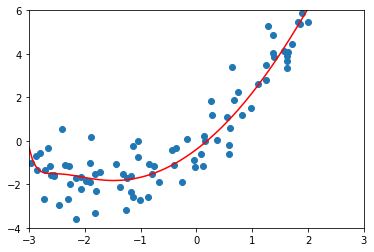

In [12]:
plot_model(lasso1_reg)

In [14]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
mean_squared_error(y_test, lasso2_reg.predict(X_test))

1.121391136888852

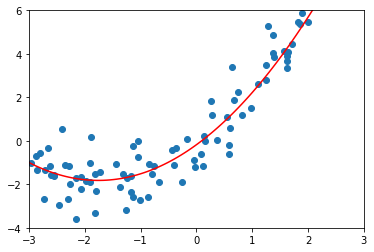

In [15]:
plot_model(lasso2_reg)

In [16]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)
mean_squared_error(y_test, lasso3_reg.predict(X_test))

3.2428014186765264

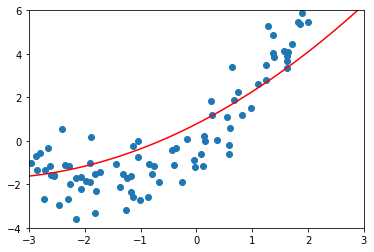

In [17]:
plot_model(lasso3_reg)